# Imports and Helper functions


In [1]:
# Import libraries
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
plt.style.use('ggplot')

In [2]:
# Create enviornment
env = gym.make('FrozenLake-v0')

In [3]:
# check the states 
state_space = env.observation_space.n

In [4]:
# check action space
action_space = env.action_space.n

In [5]:
# define hyperparameters
num_episode = 1000
gamma = 0.99


egreedy_total = []

In [7]:
V = torch.zeros([state_space])

def next_step_evaluation(state, Vvalues):
    Vtemp = torch.zeros([action_space])

    for action_possible in range(action_space):
        for prob, new_state, reward, _ in env.env.P[state][action_possible]:
            Vtemp[action_possible] += (prob * (reward + gamma * Vvalues[new_state]))

    max_value, indice = torch.max(Vtemp, 0)

    return max_value, indice


def value_iteration():
    Qvalues = torch.zeros(state_space)

    max_iterations = 1500

    for _ in range(max_iterations):
        for state in range(state_space):
            max_value, _ = next_step_evaluation(state, Qvalues)
            Qvalues[state] = max_value.item()
    return Qvalues


def build_policy(Vvalues):
    Vpolicy = torch.zeros(state_space)

    for state in range(state_space):
        _, indice = next_step_evaluation(state, Vvalues)
        Vpolicy[state] = indice.item()
    
    return Vpolicy

V = value_iteration()
Vpolicy = build_policy(V)

In [15]:
steps_total = []
total_reward = []

for i_episode in range(num_episode):
    state = env.reset()
    step = 0
    
    while True:
        step += 1
        
        action = Vpolicy[state].item()

        new_state, reward, done, info = env.step(action)

        state = new_state

        #env.render()
        if done:
            steps_total.append(step)
            total_reward.append(reward)
            #print('episode finished after %i steps' %step)
            break

In [16]:
print('Percent of episodes finished successfully : {0}'.format(sum(total_reward)/num_episode))
print('Percent of episodes finished successfully (last 100 episodes) : {0}'.format(sum(total_reward[-100:])/100))
print('Average number of steps: %.2f' % (sum(steps_total)/num_episode))
print('Average number of steps (last 100 episodes): %.2f' % (sum(steps_total[-100:])/100))

Percent of episodes finished successfully : 0.723
Percent of episodes finished successfully (last 100 episodes) : 0.7
Average number of steps: 45.48
Average number of steps (last 100 episodes): 47.70


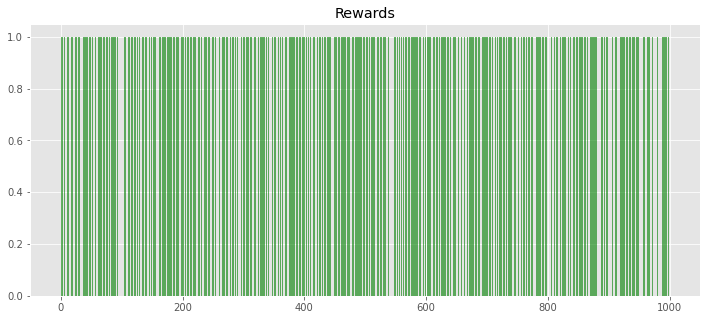

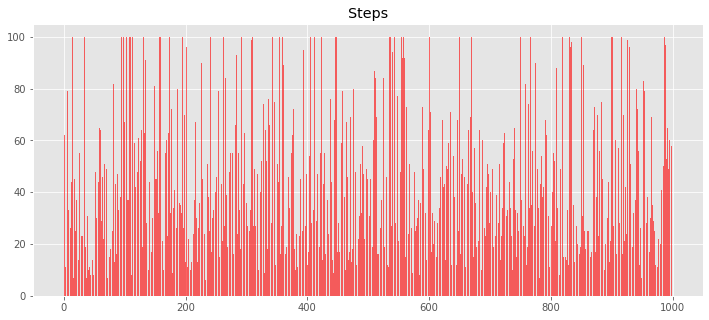

In [17]:
# Plot graphs for rewards and steps
plt.figure(figsize = (12, 5))
plt.title('Rewards')
plt.bar(torch.arange(len(total_reward)), total_reward, alpha = 0.6, color = 'green')
plt.show()

plt.figure(figsize = (12, 5))
plt.title('Steps')
plt.bar(torch.arange(len(steps_total)), steps_total, alpha = 0.6, color = 'red')
plt.show()
